# EDA Competitor data

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Read data

In [3]:
sales = pd.read_excel('Sales.xlsx')
sales.head(5)

,Quarter,Quantity,Sale
0,2021Q1,735,68.0022
1,2021Q2,330,30.5316
2,2021Q3,560,57.5680
3,2021Q4,750,77.1000
4,2022Q1,730,75.0440


In [4]:
sales.dtypes

Quarter      object
Quantity      int64
Sale        float64
dtype: object

In [5]:
sales.head(6)

,Quarter,Quantity,Sale
0,2021Q1,735,68.0022
1,2021Q2,330,30.5316
2,2021Q3,560,57.5680
3,2021Q4,750,77.1000
4,2022Q1,730,75.0440
5,2022Q2,450,46.2600


In [6]:
sale = sales['Sale']
quantity = sales['Quantity']

# 2.Data mining


## 2.1 EDA data

In [7]:
sales.describe()

,Quantity,Sale
count,12.00000,12.000000
mean,580.00000,58.711650
std,152.06159,15.609208
min,330.00000,30.531600
25%,450.00000,46.260000
50%,580.00000,59.624000
75%,731.25000,69.762650
max,800.00000,82.240000


In [8]:
#Check null
sales.isnull().sum()

Quarter     0
Quantity    0
Sale        0
dtype: int64

## 2.2 Plot 

In [9]:
sales.set_index('Quarter', inplace=True)


In [10]:
sales.describe()

,Quantity,Sale
count,12.00000,12.000000
mean,580.00000,58.711650
std,152.06159,15.609208
min,330.00000,30.531600
25%,450.00000,46.260000
50%,580.00000,59.624000
75%,731.25000,69.762650
max,800.00000,82.240000


### Histogram & Box plot


#### Sale

Text(0, 0.5, 'Count')

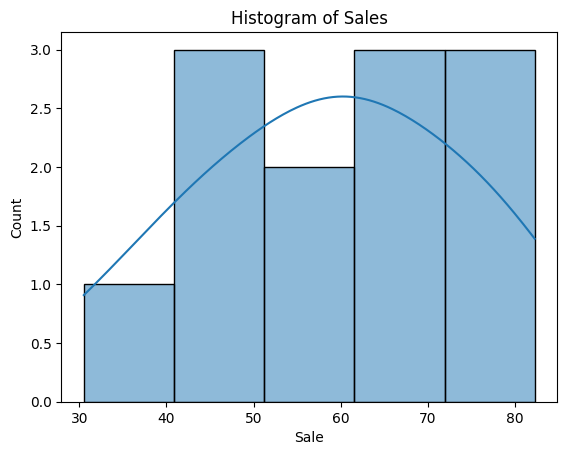

In [11]:
sns.histplot(sale, kde=True)
plt.title('Histogram of Sales')
plt.xlabel('Sale')
plt.ylabel('Count')

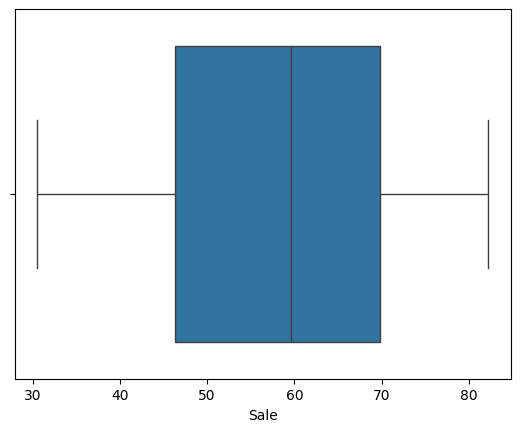

In [12]:
boxplot = sns.boxplot(x=sale)

# Calculate interquartile range
Q1 = sale.quantile(0.25)
Q3 = sale.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = sales[(sales['Sale'] < lower_bound) | (sales['Sale'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Sale']))
    
plt.show()


#### Quantity

Text(0, 0.5, 'Count')

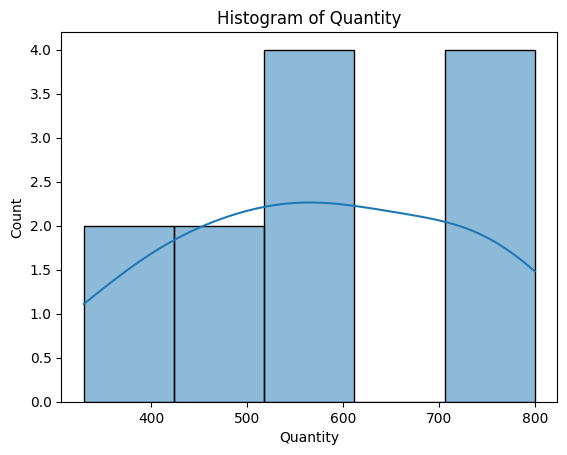

In [13]:
# histogram 
sns.histplot(quantity, kde = True)
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')

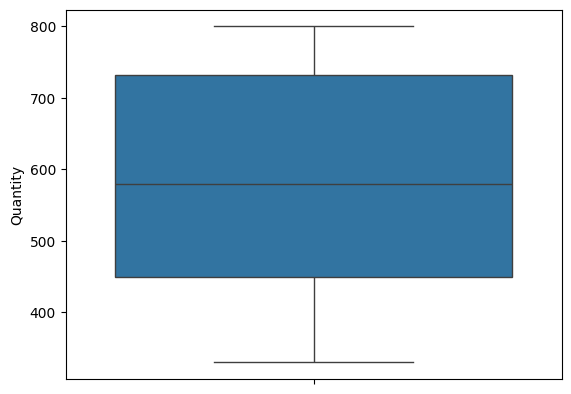

In [14]:
# Box plot 
sns.boxplot(quantity)

#calculate the quantile
Q1 = quantity.quantile(0.25)
Q3 = quantity.quantile(0.75)
IQR = Q3 - Q1

#defind the upper and lower bound

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Find outliers
outliers = sales[(sales['Quantity'] < lower_bound) | (sales['Quantity'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Quantity']))

plt.show()



### Plot  Sale and Quantity 

Text(0.5, 0, 'Time')

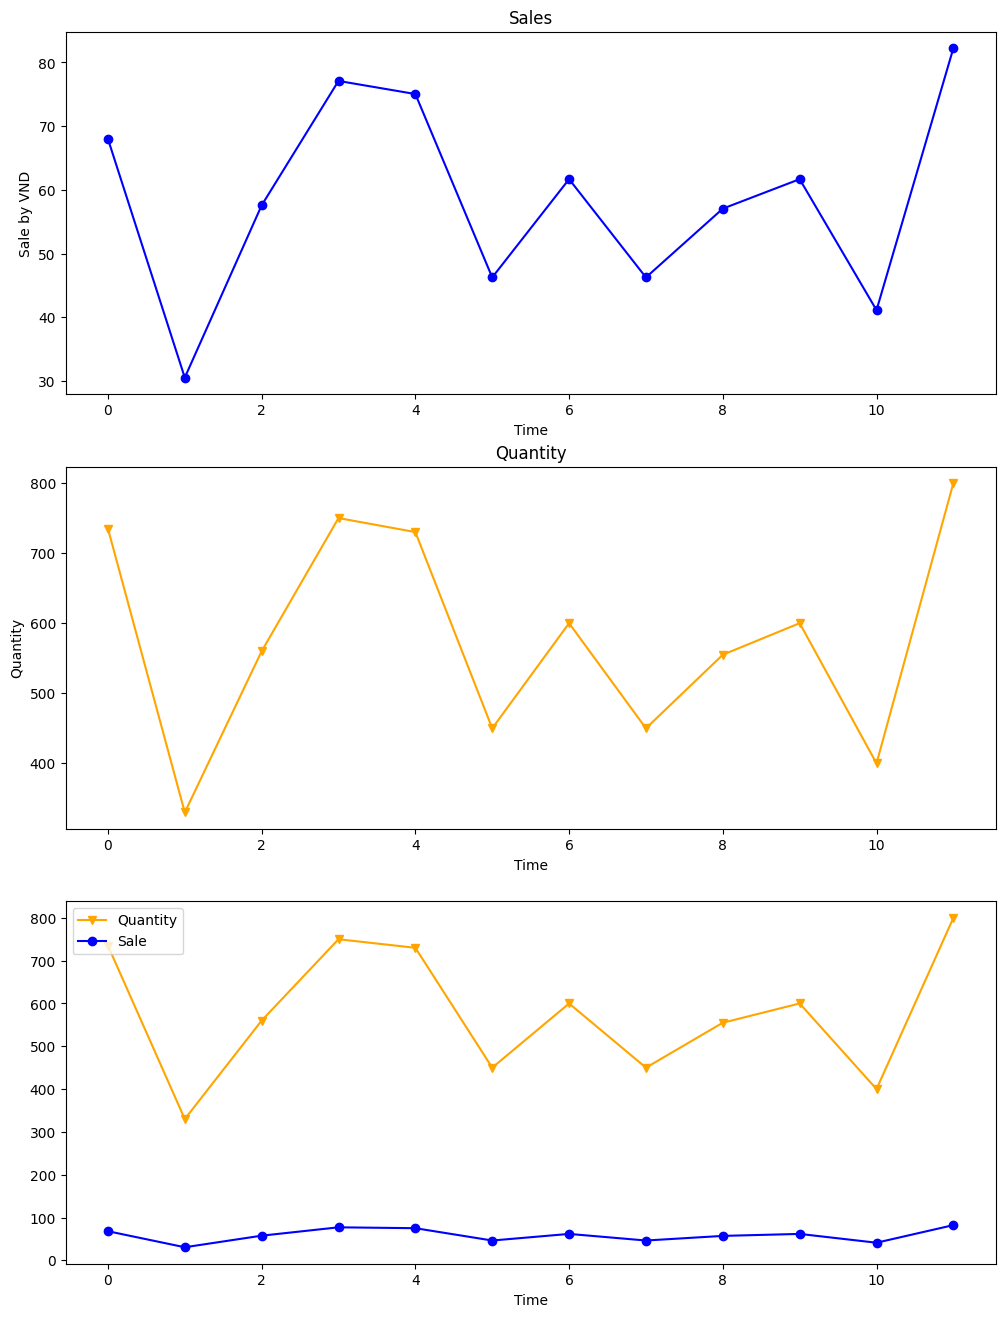

In [15]:
# create figure object 
fig, ax = plt.subplots(3,1,figsize = (12,16))

#Sales Competitor 
ax[0].plot(sale, marker = 'o', linestyle = '-', color = 'b')
ax[0].set_title('Sales')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Sale by VND')

#Quantity competitor
ax[1].plot(quantity, marker = 'v', linestyle = '-', color = 'orange')
ax[1].set_title('Quantity')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Quantity')

# Sale and Quantity competitor
ax[2].plot(quantity, marker = 'v', linestyle = '-', color = 'orange', label = 'Quantity')
ax[2].plot(sale, marker = 'o', linestyle = '-', color = 'Blue',  label = 'Sale')
ax[2].legend(loc = 'upper left')
ax[2].set_xlabel('Time')



### Correlation diagram

<Axes: >

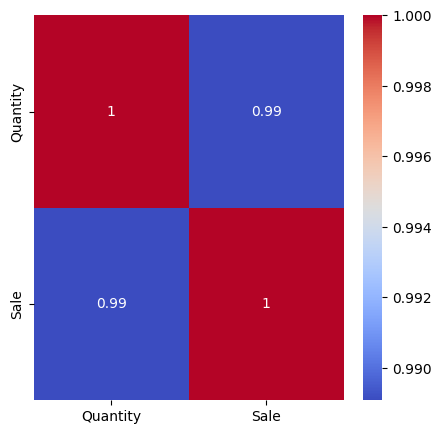

In [16]:
# correlation matrix
corre_matrix = sales[['Quantity','Sale']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corre_matrix,annot=True,cmap='coolwarm')

## 2.3 Trend, Seasonal, Resid decompose

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Plot trend, resid, season

#### Sale

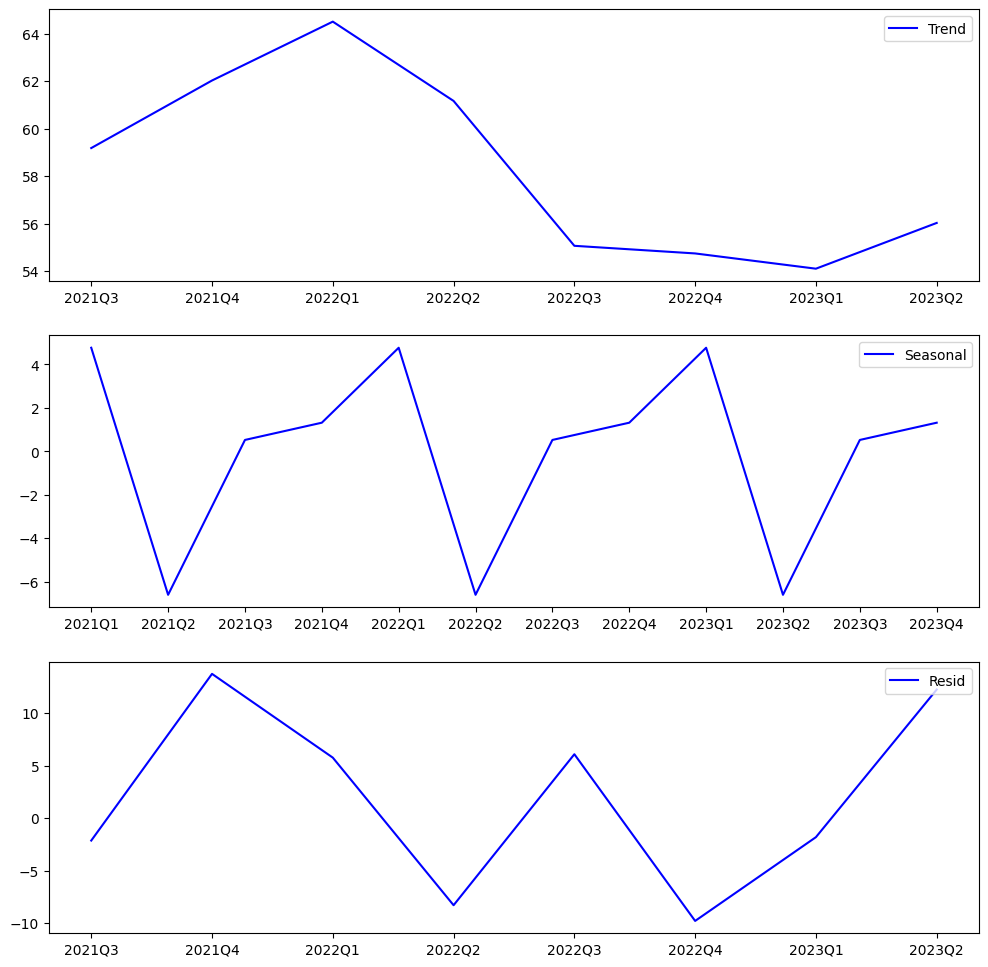

In [18]:
fig, ax = plt.subplots(3,1, figsize = (12,12))

result = seasonal_decompose(sales['Sale'],model='addictive', period=4)

# Trend
ax[0].plot(result.trend, color = 'b',label = 'Trend')
ax[0].legend(loc = 'upper right')

#Seasonal
ax[1].plot(result.seasonal, color = 'b', label = 'Seasonal')
ax[1].legend(loc = 'upper right')

#Resid
ax[2].plot(result.resid, color = 'b', label = 'Resid')
ax[2].legend(loc = 'upper right')

#### Quantity

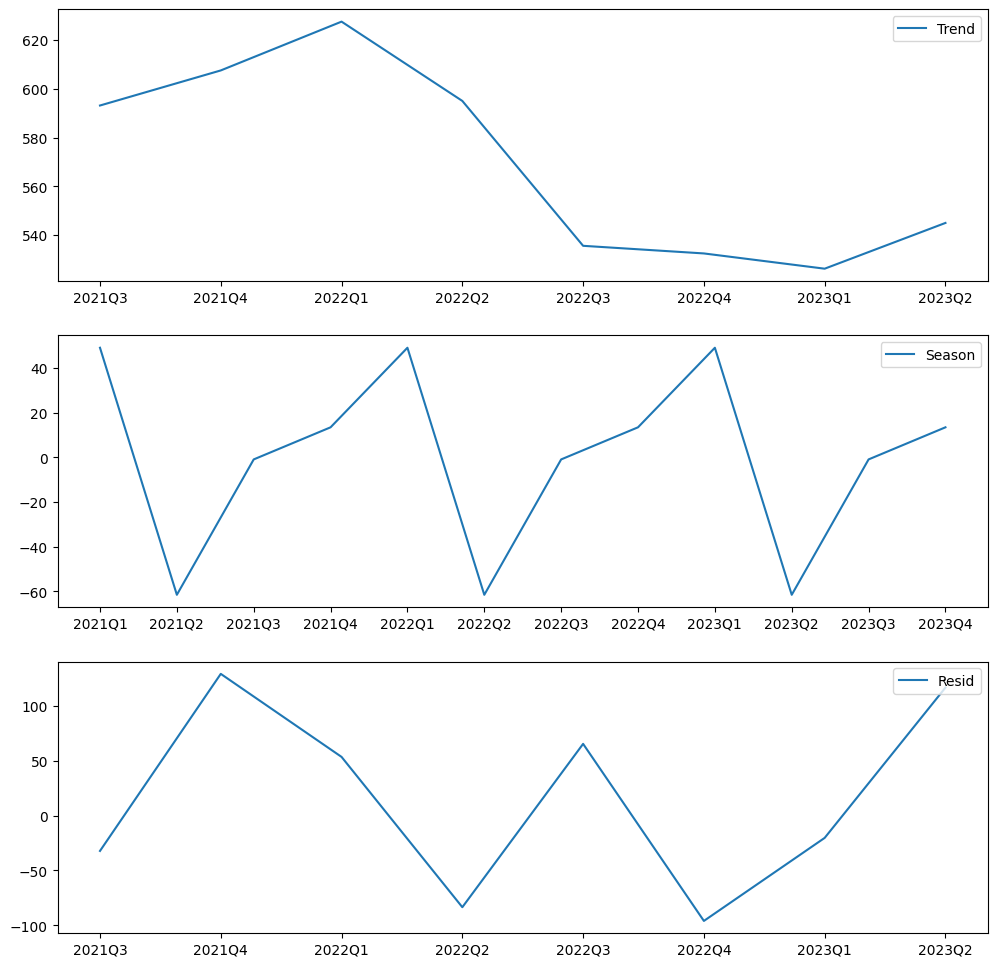

In [19]:
fig, ax = plt.subplots(3,1, figsize = (12,12))

result = seasonal_decompose(sales['Quantity'],model='addictive',period=4)

# Plot
## Trend
ax[0].plot(result.trend, label = 'Trend')
ax[0].legend(loc = 'upper right')

## Season 
ax[1].plot(result.seasonal, label = 'Season')
ax[1].legend(loc = 'upper right')

## Resid 
ax[2].plot(result.resid, label = 'Resid')
ax[2].legend(loc = 'upper right')


## 2.4 Check Stationary

In [20]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Sales

In [21]:
sale_adf = adfuller(sales['Sale'], autolag='AIC')
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")
print('Critical Values: ')
for key, value in sale_adf[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -3.3439152498333136 
p_value 0.013026007204626914 
lags_use: 4
Critical Values: 
	1%: -4.939
	5%: -3.478
	10%: -2.844


In [29]:
sale_diff = sales['Sale'].diff().dropna()
sale_adf = adfuller(sale_diff, autolag='AIC')
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")
print('Critical Values: ')
for key, value in sale_adf[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -3.7037251935810813 
p_value 0.004061060030171576 
lags_use: 3
Critical Values: 
	1%: -4.939
	5%: -3.478
	10%: -2.844


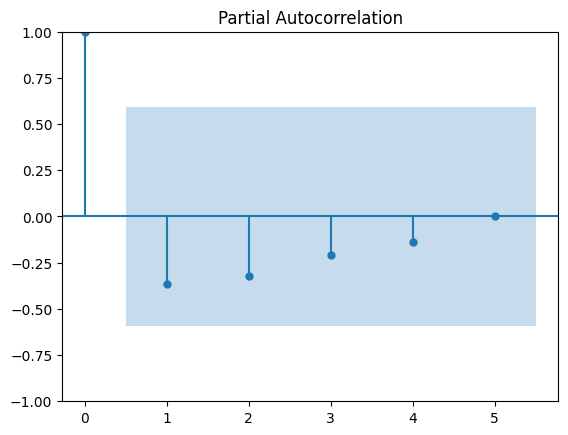

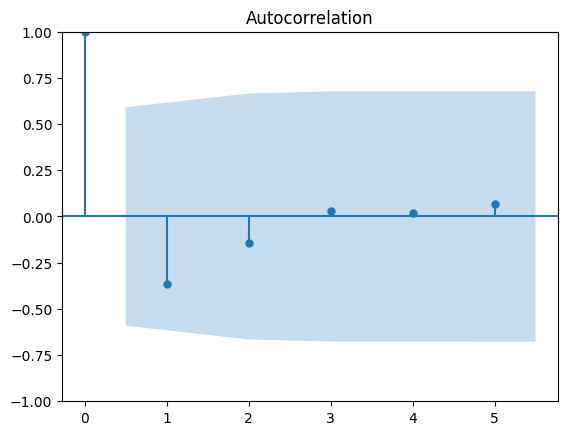

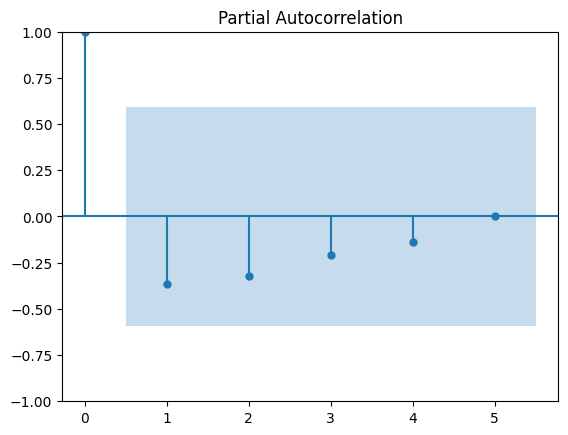

In [42]:
plot_acf(sale_diff)
plot_pacf(sale_diff)

In [40]:
import numpy as np

sale_log = np.log(sales['Sale'])


sale_adf = adfuller(sale_log, maxlag = 4 )
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")
print('Critical Values: ')
for key, value in sale_adf[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -1117.611024452301 
p_value 0.0 
lags_use: 4
Critical Values: 
	1%: -4.939
	5%: -3.478
	10%: -2.844


#### Note
- The Sale is stationary 

### Quantity 

In [23]:
sale_adf = adfuller(sales['Quantity'], autolag='AIC')
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]} ")
print('Critical Values: ')
for key, value in sale_adf[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -3.5590826851859325 
p_value 0.006593221180946816 
lags_use: 4 
Critical Values: 
	1%: -4.939
	5%: -3.478
	10%: -2.844


In [24]:
sale_adf = adfuller(sales['Quantity'], regression='ct', maxlag = 1)
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")
print('Critical Values: ')
for key, value in sale_adf[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -3.7803114670915754 
p_value 0.017584122288113783 
lags_use: 0
Critical Values: 
	1%: -5.118
	5%: -3.918
	10%: -3.411


#### Note 
- The quantity is stationary

## 2.5 PACF and ACF

### Sale

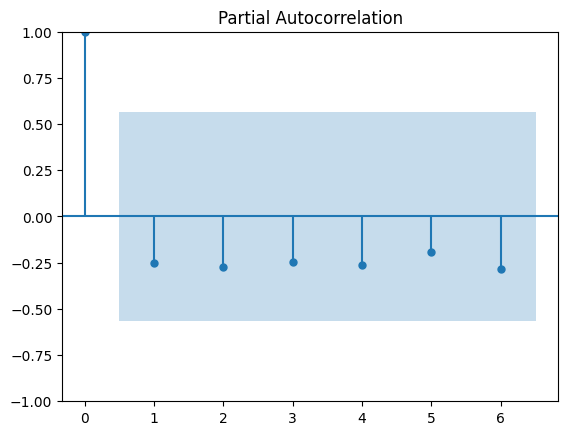

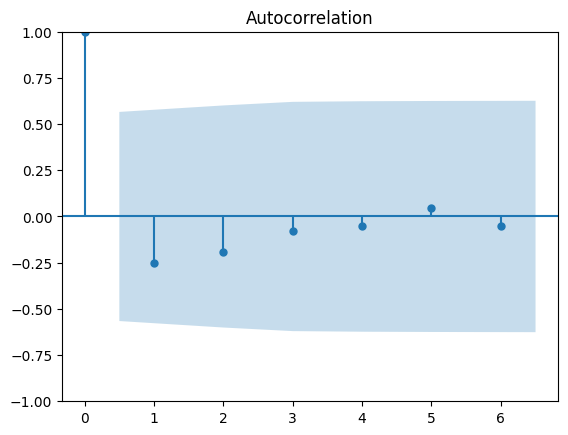

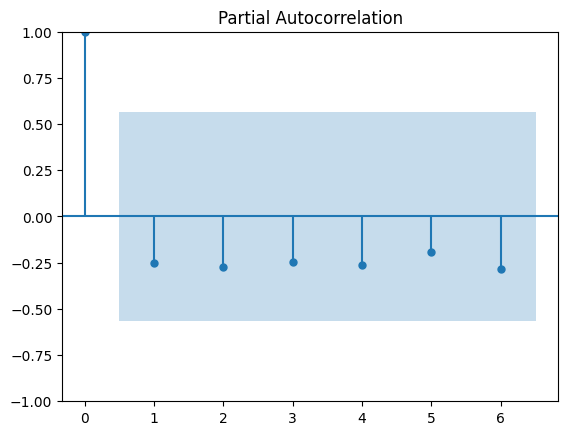

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF on the first axis
plot_acf(sales['Sale'], lags=6)
plot_pacf(sales['Sale'], lags=6)


### Quantity 

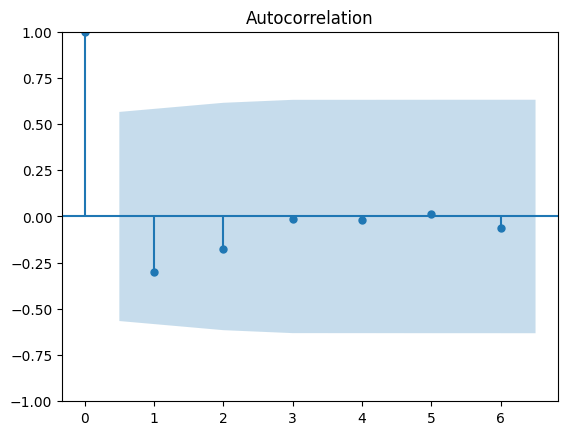

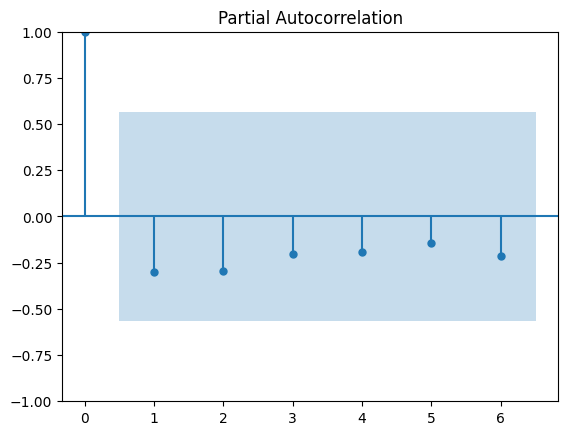

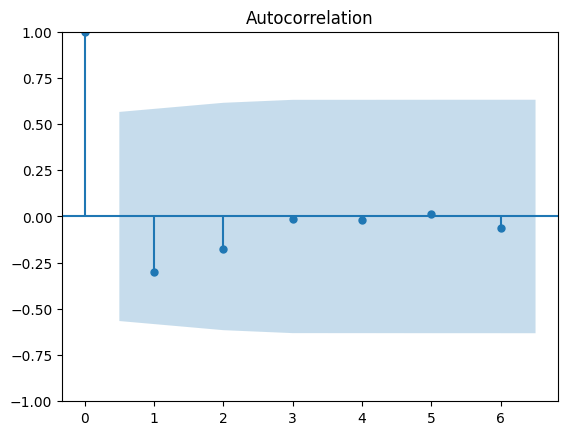

In [26]:
plot_pacf(sales['Quantity'],lags=6)
plot_acf(sales['Quantity'],lags=6)

In [27]:

#Importing Packages
!pip install pmdarima
from pmdarima import auto_arima

auto_arima(sale, seasonal=True, m=4, trace=True).summary()



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

# Giả sử 'sales' là DataFrame của bạn với chỉ số thời gian
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
train, test = train_test_split(sales['Sale'], test_size=0.2)

# Sử dụng auto_arima để tự động chọn mô hình ARIMA tốt nhất
model = pm.auto_arima(train, seasonal=True, m=4)

# In tóm tắt của mô hình tốt nhất
print(model.summary())

# Vẽ đồ thị ACF và PACF của phần dư
model.plot_diagnostics()

# Dự đoán giá trị tương lai dựa trên tập kiểm thử
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Vẽ giá trị quan sát, dự đoán và khoảng tin cậy
plt.plot(sales.index, sales['Sale'], label='Quan sát')
plt.plot(test.index, forecast, color='red', label='Dự đoán')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Khoảng tin cậy')
plt.legend()
plt.show()

ValueError: shapes (4,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)